# Рекуррентные нейронных сетей

In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [2]:
df = pd.read_excel("Revised_Data_Turbine.xlsx")
df

,Index,Hour_Time,Gas_fuel_fired_hours,Liquid fuel fired hours,Turbine hours,Start count,Compressor inlet air temp. (T1),Compressor T5 average,Turbine air inlet filter DP,Compressor outlet air pressure (PCD),...,Generator excitation current,Generator L1 winding temperature,Generator L2 winding temperature,Generator L3 winding temperature,Instrument Air Pressure,Enclosure Main Filter DP,Turbine Air Inlet Filter DP2,Turbine Air Inlet Pre Filter DP,Turbine Air Inlet PrePre Filter DP,Gas Fuel Control Temperature
0,0,H7,8613,3018,11678.0,925,26.1,280.0,0.99,8.4,...,2.4,49.0,50,50.0,6.14,0.8,1,0.92,0.26,38
1,1,H8,8614,3018,11679.0,925,25.7,282.0,0.98,8.4,...,2.4,48.0,49,49.0,6.19,0.8,0.97,0.91,0.25,37
2,2,H9,8615,3018,11680.0,925,25.5,279.0,0.97,8.4,...,2.4,47.0,48,48.0,6.21,0.79,0.98,0.91,0.26,35
3,3,H10,8616,3018,11681.0,925,25.4,277.0,0.99,8.4,...,2.4,47.0,48,48.0,6.22,0.79,1,0.93,0.27,35
4,4,H11,8617,3018,11683.0,925,25.4,277.0,0.99,8.4,...,2.4,47.0,48,48.0,6.22,0.79,1,0.93,0.27,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,2979,H2,11400,3374,14818.0,24.1,1250.0,545.0,1.08,9.8,...,3.9,67.0,68,68.0,6.58,0.46,1.08,1.13,0.8,31
2980,2980,H3,11401,3374,14819.0,23.9,1250.0,520.0,1.05,9.7,...,3.7,65.0,66,66.0,6.63,0.47,1.06,1.13,0.64,31
2981,2981,H4,11402,3374,14820.0,22.8,1250.0,582.0,1.06,9.8,...,3.9,65.0,66,66.0,6.59,0.47,1.06,1.13,0.77,30
2982,2982,H5,11403,3374,14821.0,21.8,1250.0,385.0,1.05,9,...,3,62.0,63,63.0,6.59,0.47,1.06,1.13,0.79,30


In [3]:
for i in range(len(df.values[1178])):
    print(df.values[1178][i], df.values[1179][i], df.values[1180][i])

1178 1179 1180
H11 H12 H13
9621 9621 9622
3326 3326 3326
12992.0 12993.0 12994.0
28.7 29.4 30.6
1151.0 1151.0 1151.0
446.0 483.0 556.0
0.94 0.93 0.93
9.2 9.3 9.7
10.4 10.1 10.0
72.0 72.0 73.0
45.0 46.0 49.0
22 20 20
23 23 22
33 15 17
10 10 10
31 31 30
27 27 24
4.4 5.3 6.1
450.0 483.0 559.0
451 490 574
458.0 487.0 547.0
450 492 584
438.0 474.0 518.0
435 466 548
358.0 382.0 441.0
70 70 70
67 67 68
747 825 1189
24.1 23.9 20.8
0.0 0.0 0.0
0.45 0.42 0.36
10972 10976 10965
133.0 154.0 206.0
134 156 207
137 159 209
2379.0 2761.0 4208.0
2587 2977 4426
959.0 4214.0 1376.0
0.93 0.92 0.94
50.0 50.0 50.0
3.2 3.5 40
55.0 60.0 67.0
56 61 68
55.0 60.0 67.0
6.14 6.26 6.13
0.71 0.71 0.71
0.93 0.93 0.93
0.95 0.92 0.92
0.16 0.16 0.14
32 33 34


In [4]:
df = df.set_index('Index')
df = df.drop('Hour_Time', axis = 1)
df = pd.DataFrame(df[['Turbine_vibration_2X','Turbine_vibration_2Y']], columns = ['Turbine_vibration_2X','Turbine_vibration_2Y'])

'''
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i].fillna(0, inplace=True)
df
'''

"\nfor i in df.columns:\n    df[i] = pd.to_numeric(df[i], errors='coerce')\n    df[i].fillna(0, inplace=True)\ndf\n"

In [5]:
df.columns

Index(['Turbine_vibration_2X', 'Turbine_vibration_2Y'], dtype='object')

In [6]:
df.sort_values(by=['Turbine_vibration_2X'], ascending=False)[:int(len(df.Turbine_vibration_2X)*0.05)]

,Turbine_vibration_2X,Turbine_vibration_2Y
Index,,
1178,33,10
1583,30,25
1550,28,14
1553,27,19
1552,27,19
...,...,...
2901,21,16
2628,21,14
503,21,16


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BC69E7978>],
      dtype=object)

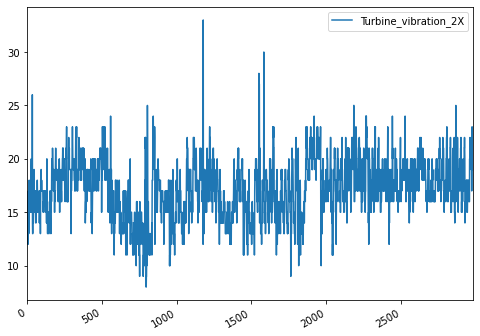

In [7]:
n = 0
k = None
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False
uni_data = df[['Turbine_vibration_2X']][n:k]
uni_data.index = list(df.index.values[n:k])
uni_data.head()
uni_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BC68D7940>],
      dtype=object)

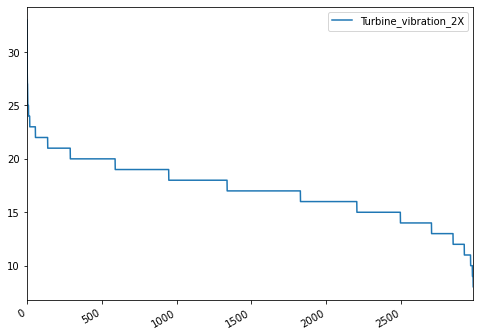

In [8]:
n = 0
k = None
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False
uni_data = df.sort_values(by=['Turbine_vibration_2X'], ascending=False)[['Turbine_vibration_2X']][n:k]
uni_data.index = list(df.index.values[n:k])
uni_data.head()
uni_data.plot(subplots=True)

In [9]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [10]:
TRAIN_SPLIT = 2000
tf.random.set_seed(1)

In [11]:
uni_data = df['Turbine_vibration_2X']
uni_data.index = df.index
uni_data.head()

Index
0    15
1    14
2    15
3    15
4    15
Name: Turbine_vibration_2X, dtype: int64

In [12]:
uni_data = uni_data.values

In [13]:
uni_data = tf.keras.utils.normalize(uni_data)[0]
uni_data

array([0.01580318, 0.01474964, 0.01580318, ..., 0.02107091, 0.02001736,
       0.02001736])

In [14]:
univariate_past_history = 100
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, None,
                                           univariate_past_history,
                                           univariate_future_target)

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

x_test_max, y_test_max = univariate_data(uni_data, 1483, 1584,
                                       univariate_past_history,
                                       univariate_future_target)
print ('Single window of past history')
print (x_val_uni[0])
print ('\n Target temperature to predict')
print (y_val_uni[0])

Single window of past history
[[0.01685673]
 [0.01791027]
 [0.02001736]
 [0.01896382]
 [0.01791027]
 [0.01896382]
 [0.02001736]
 [0.02212445]
 [0.02107091]
 [0.02107091]
 [0.02001736]
 [0.01791027]
 [0.01685673]
 [0.01791027]
 [0.01791027]
 [0.01791027]
 [0.01791027]
 [0.01791027]
 [0.01791027]
 [0.01791027]
 [0.01896382]
 [0.01896382]
 [0.01791027]
 [0.01791027]
 [0.01791027]
 [0.01896382]
 [0.02001736]
 [0.02107091]
 [0.023178  ]
 [0.023178  ]
 [0.023178  ]
 [0.02107091]
 [0.02001736]
 [0.01580318]
 [0.02001736]
 [0.02001736]
 [0.01685673]
 [0.01580318]
 [0.01474964]
 [0.01685673]
 [0.011589  ]
 [0.011589  ]
 [0.011589  ]
 [0.01264255]
 [0.011589  ]
 [0.011589  ]
 [0.011589  ]
 [0.01685673]
 [0.01580318]
 [0.02001736]
 [0.01896382]
 [0.02001736]
 [0.02001736]
 [0.02001736]
 [0.02001736]
 [0.02212445]
 [0.02107091]
 [0.02212445]
 [0.02107091]
 [0.01896382]
 [0.01896382]
 [0.01791027]
 [0.01791027]
 [0.01685673]
 [0.01791027]
 [0.01896382]
 [0.01264255]
 [0.01474964]
 [0.01580318]
 [0.

In [15]:
def create_time_steps(length):
  return list(range(-length, 0))
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [16]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

# LSTM-модель для прогнозирование

In [17]:
BATCH_SIZE = 64
BUFFER_SIZE = 100

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))

In [18]:
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [19]:
val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [20]:
test_univariate = tf.data.Dataset.from_tensor_slices((x_test_max, y_test_max))
test_univariate = test_univariate.batch(BATCH_SIZE).repeat()

In [21]:
x_train_uni.shape[-2:]

(100, 1)

In [22]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse')

In [252]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(64, 1)


In [253]:
print(x_train_uni.shape)

(2884, 100, 1)


In [254]:
EVALUATION_INTERVAL = 200
EPOCHS = 40

single_step_history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=200)

Train for 200 steps, validate for 200 steps
Epoch 1/40
200/200 [==============================] - 11s 57ms/step - loss: 1.2272e-05 - val_loss: 4.8542e-06
Epoch 2/40
200/200 [==============================] - 11s 53ms/step - loss: 9.7095e-06 - val_loss: 6.2883e-06
Epoch 3/40
200/200 [==============================] - 11s 54ms/step - loss: 8.7444e-06 - val_loss: 4.2319e-06
Epoch 4/40
200/200 [==============================] - 11s 54ms/step - loss: 8.5923e-06 - val_loss: 3.9176e-06
Epoch 5/40
200/200 [==============================] - 14s 70ms/step - loss: 7.9221e-06 - val_loss: 6.5978e-06
Epoch 6/40
200/200 [==============================] - 11s 56ms/step - loss: 7.3990e-06 - val_loss: 3.7206e-06
Epoch 7/40
200/200 [==============================] - 11s 55ms/step - loss: 7.1412e-06 - val_loss: 3.6549e-06
Epoch 8/40
200/200 [==============================] - 11s 54ms/step - loss: 6.7271e-06 - val_loss: 3.7062e-06
Epoch 9/40
200/200 [==============================] - 11s 54ms/step - loss: 

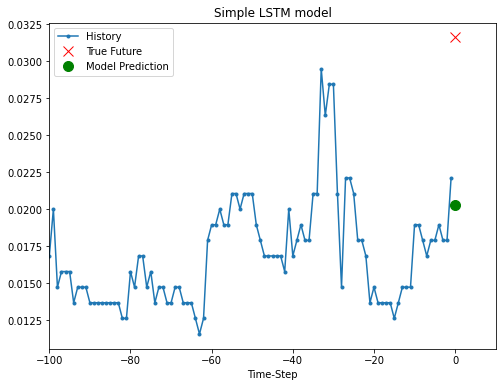

In [255]:
for x, y in test_univariate.take(1):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

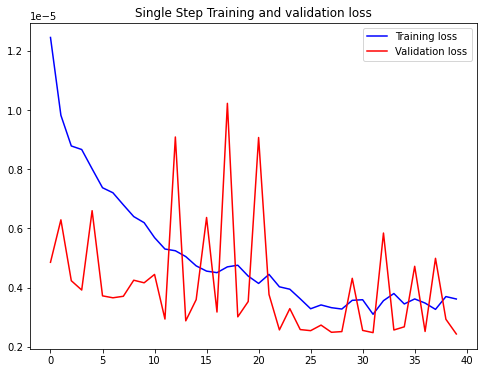

In [256]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

# Multidemensial

In [23]:
features_considered = ['Turbine_vibration_2X',
       'Turbine_vibration_2Y']

In [24]:
features = df[features_considered]
#features.index = df['Date Time']
features.head()

,Turbine_vibration_2X,Turbine_vibration_2Y
Index,,
0,15,9
1,14,9
2,15,10
3,15,10
4,15,10


In [25]:
features.max()

Turbine_vibration_2X    33
Turbine_vibration_2Y    33
dtype: int64

In [26]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

In [27]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [28]:
past_history = 100
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 0], 0,
                                                   None, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 0],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [29]:
x_train_single.shape

(2884, 100, 2)

In [30]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (100, 2)


In [32]:
x_train_single.shape[-2:]

(100, 2)

In [31]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [295]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(64, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(128))
single_step_model.add(tf.keras.layers.Dense(1, activation='linear'))

single_step_model.compile(optimizer='adam', loss='mse')

In [296]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(64, 1)


35 + 5 + 10 + 10 + 10 + 10 + 

In [297]:
EVALUATION_INTERVAL = 200
single_step_history = single_step_model.fit(train_data_single, epochs=100,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=200)

Train for 200 steps, validate for 200 steps
Epoch 1/100
200/200 [==============================] - 11s 54ms/step - loss: 0.3570 - val_loss: 0.2674
Epoch 2/100
200/200 [==============================] - 11s 54ms/step - loss: 0.3079 - val_loss: 0.2627
Epoch 3/100
200/200 [==============================] - 10s 52ms/step - loss: 0.2999 - val_loss: 0.2553
Epoch 4/100
200/200 [==============================] - 11s 55ms/step - loss: 0.3028 - val_loss: 0.2599
Epoch 5/100
200/200 [==============================] - 11s 57ms/step - loss: 0.3092 - val_loss: 0.2538
Epoch 6/100
200/200 [==============================] - 13s 63ms/step - loss: 0.2865 - val_loss: 0.2522
Epoch 7/100
200/200 [==============================] - 11s 55ms/step - loss: 0.2884 - val_loss: 0.2516
Epoch 8/100
200/200 [==============================] - 12s 58ms/step - loss: 0.2856 - val_loss: 0.2529
Epoch 9/100
200/200 [==============================] - 11s 54ms/step - loss: 0.2716 - val_loss: 0.2468
Epoch 10/100
200/200 [=======

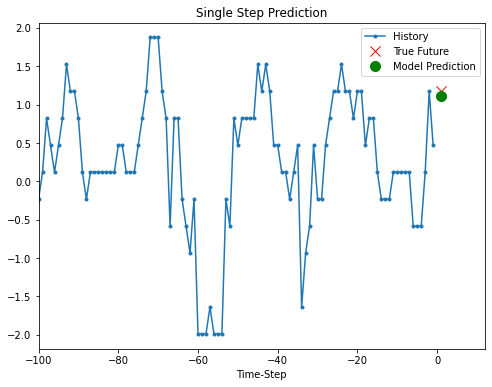

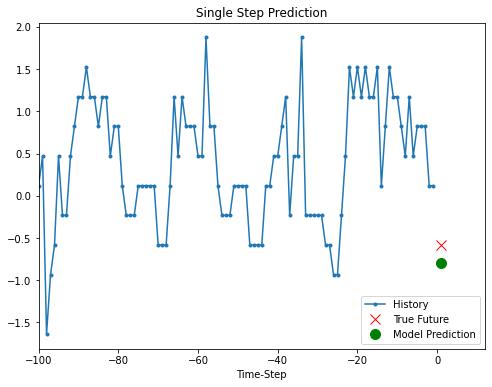

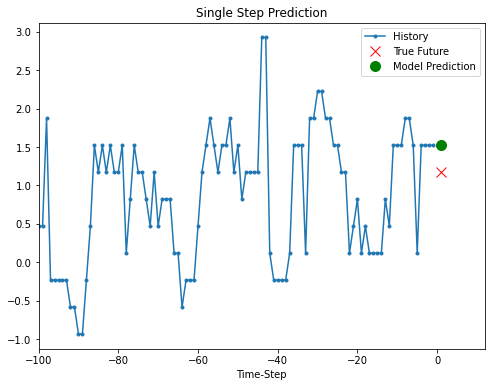

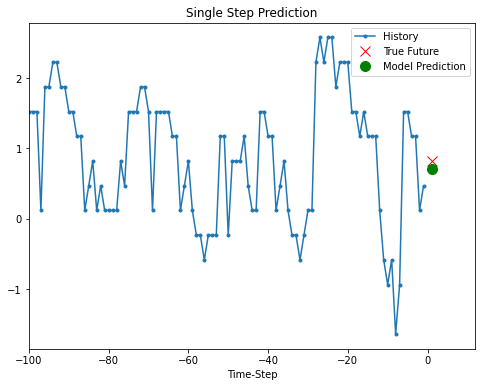

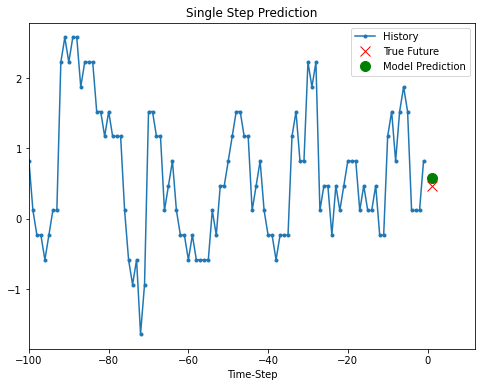

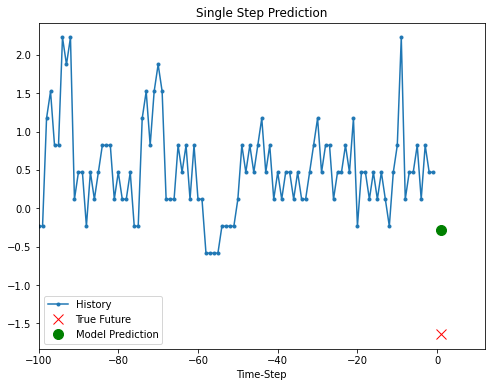

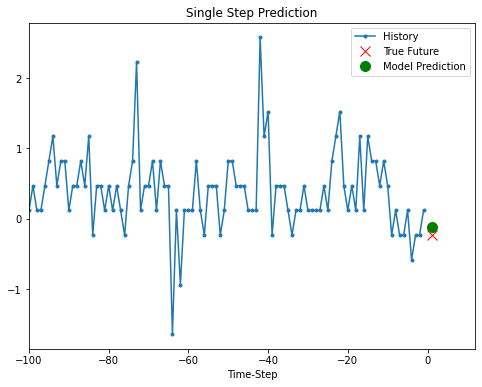

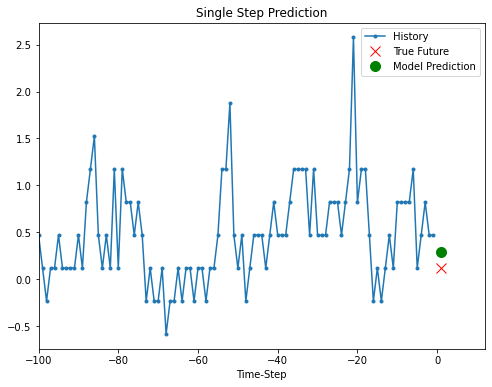

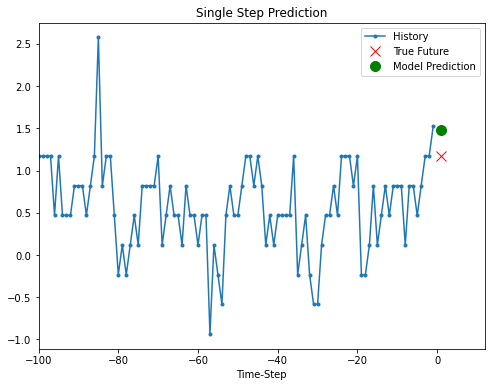

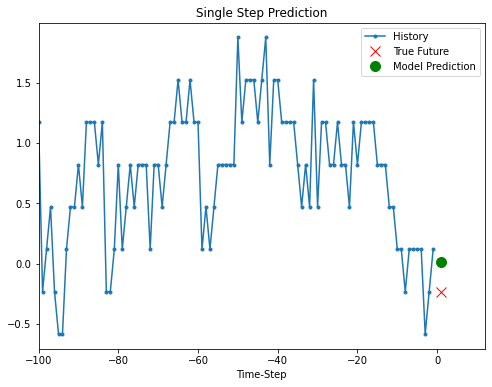

In [298]:
for x, y in val_data_single.take(10):
  plot = show_plot([x[0][:, 0].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 1,
                   'Single Step Prediction')
  plot.show()

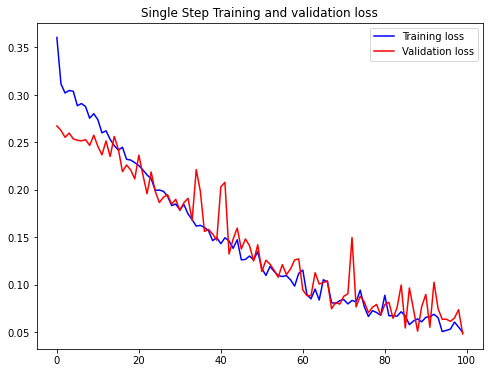

In [299]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

# TESTING

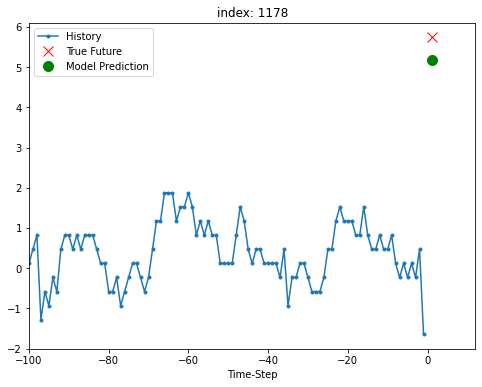

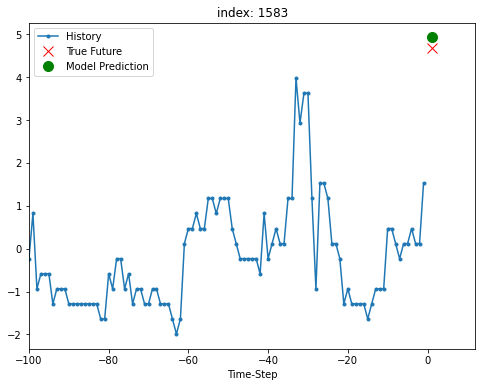

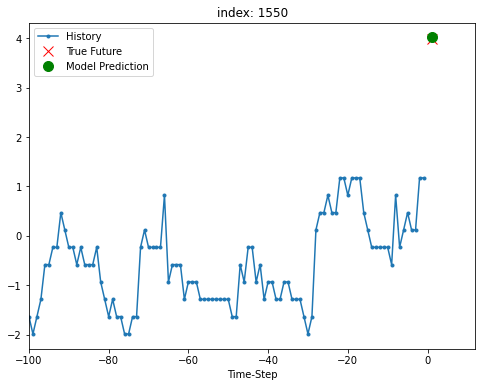

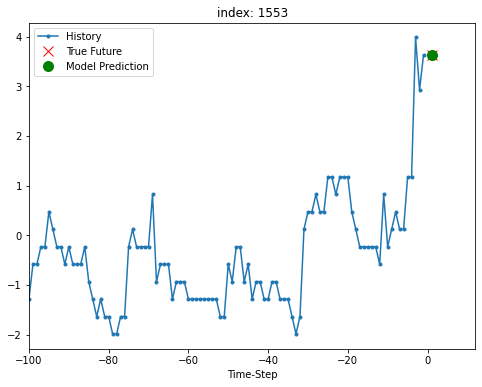

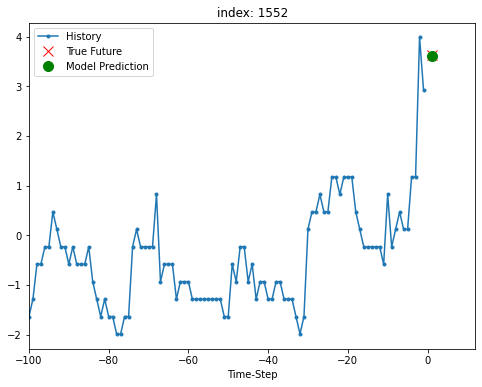

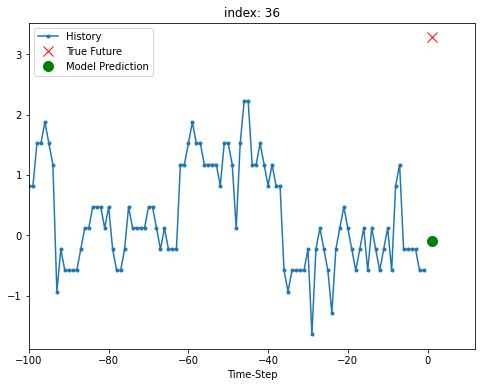

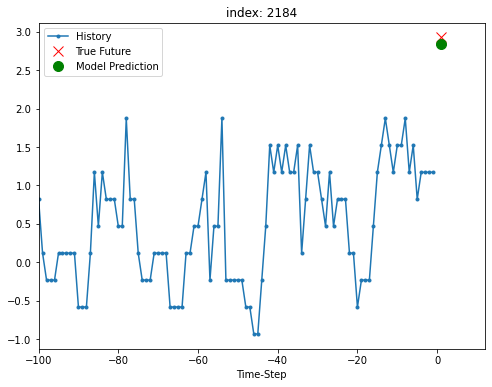

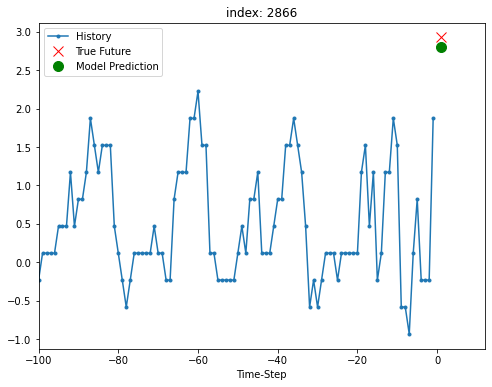

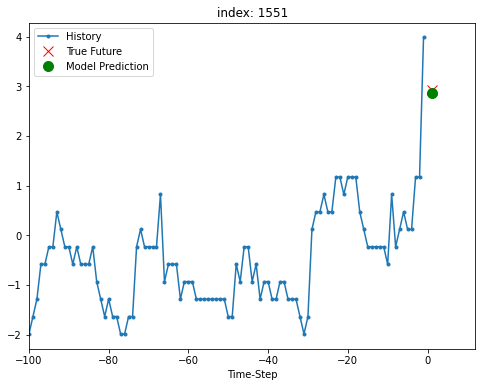

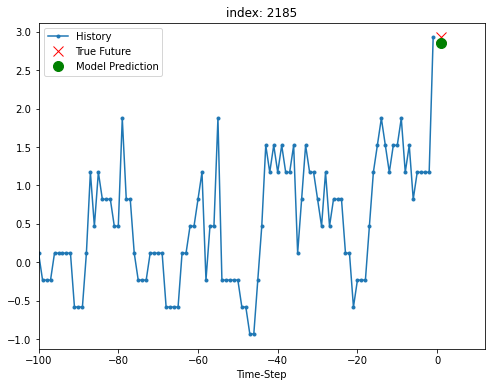

In [300]:
for i in df.sort_values(by=['Turbine_vibration_2X'], ascending=False)[:int(len(df.Turbine_vibration_2X)*0.05)].index[:10]:
    x_test_single, y_test_single = multivariate_data(dataset, dataset[:, 0],
                                               i-100, i+1, past_history,
                                               future_target, STEP,
                                               single_step=True)
    test_data_single = tf.data.Dataset.from_tensor_slices((x_test_single, y_test_single))
    test_data_single = test_data_single.batch(BATCH_SIZE).repeat()
    for x, y in test_data_single.take(1):
        plot = show_plot([x[0][:, 0].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 1,
                   'index: ' + str(i))
        plot.show()